In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

Homiladorliklar  Glyukoza  Qon bosimi  Terining qalinligi  Insulin   BMI  \
0                2       138          62                  35        0  33.6   
1                0        84          82                  31      125  38.2   
2                0       145           0                   0        0  44.2   
3                0       135          68                  42      250  42.3   
4                1       139          62                  41      480  40.7   

   Qandli diabetning naslchilik funktsiyasi  Yoshi  Natija  
0                                     0.127     47       1  
1                                     0.233     23       0  
2                                     0.630     31       1  
3                                     0.365     24       1  
4                                     0.536     21       0

In [4]:
df.describe()

Homiladorliklar     Glyukoza   Qon bosimi  Terining qalinligi  \
count      2000.000000  2000.000000  2000.000000         2000.000000   
mean          3.703500   121.182500    69.145500           20.935000   
std           3.306063    32.068636    19.188315           16.103243   
min           0.000000     0.000000     0.000000            0.000000   
25%           1.000000    99.000000    63.500000            0.000000   
50%           3.000000   117.000000    72.000000           23.000000   
75%           6.000000   141.000000    80.000000           32.000000   
max          17.000000   199.000000   122.000000          110.000000   

           Insulin          BMI  Qandli diabetning naslchilik funktsiyasi  \
count  2000.000000  2000.000000                               2000.000000   
mean     80.254000    32.193000                                  0.470930   
std     111.180534     8.149901                                  0.323553   
min       0.000000     0.000000                                  0.078000   
25%       0.000000    27.375000                                  0.244000   
50%      40.000000    32.300000                                  0.376000   
75%     130.000000    36.800000                                  0.624000   
max     744.000000    80.600000                                  2.420000   

             Yoshi       Natija  
count  2000.000000  2000.000000  
mean     33.090500     0.342000  
std      11.786423     0.474498  
min      21.000000     0.000000  
25%      24.000000     0.000000  
50%      29.000000     0.000000  
75%      40.000000     1.000000  
max      81.000000     1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Homiladorliklar                           2000 non-null   int64  
 1   Glyukoza                                  2000 non-null   int64  
 2   Qon bosimi                                2000 non-null   int64  
 3   Terining qalinligi                        2000 non-null   int64  
 4   Insulin                                   2000 non-null   int64  
 5   BMI                                       2000 non-null   float64
 6   Qandli diabetning naslchilik funktsiyasi  2000 non-null   float64
 7   Yoshi                                     2000 non-null   int64  
 8   Natija                                    2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [6]:
df.isnull().values.any()

False

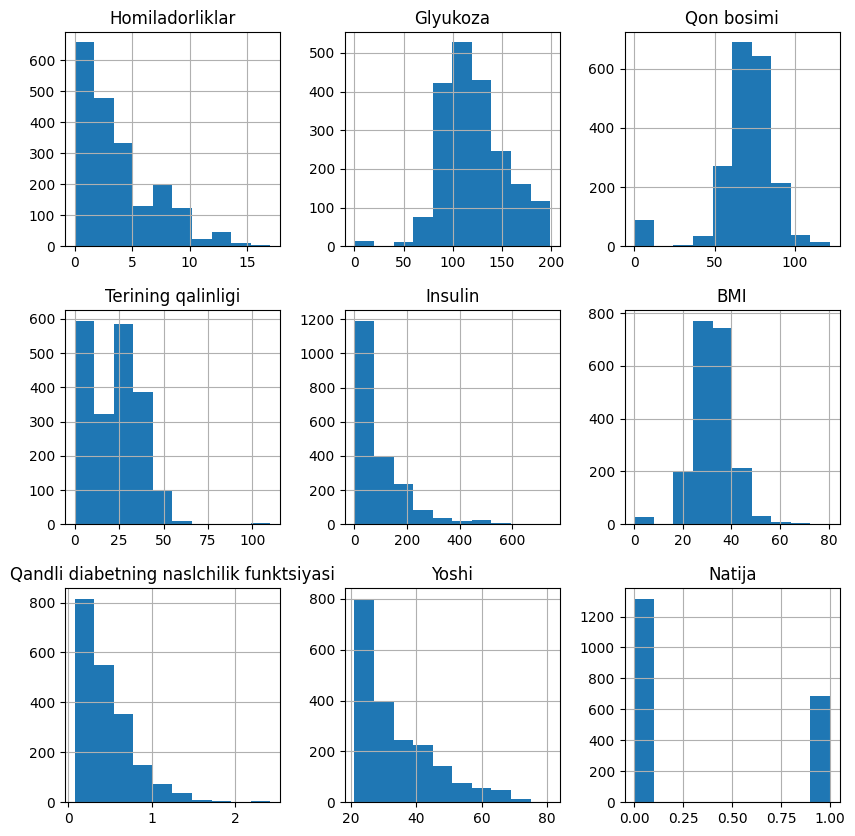

In [7]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: >

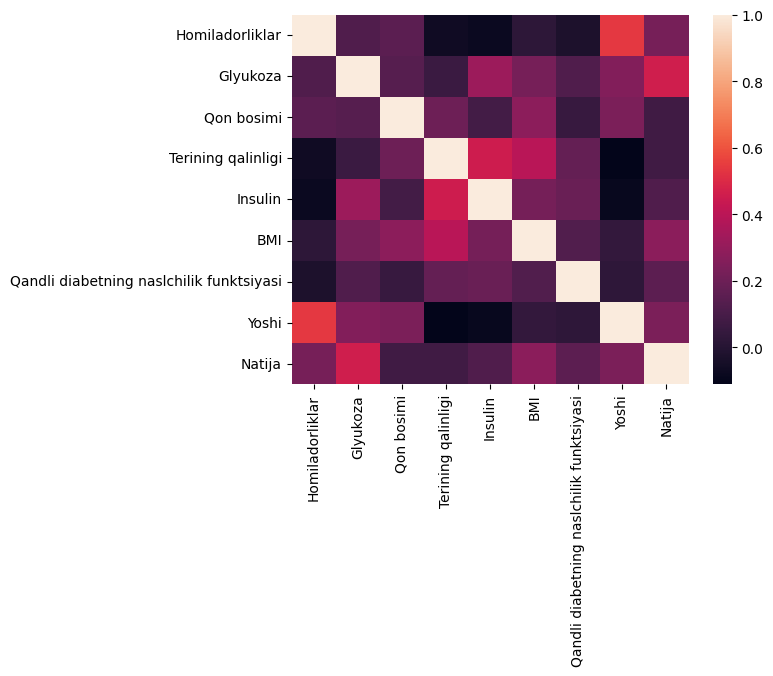

In [9]:
sns.heatmap(df.corr())
# terining qalinligi, insulin, homiladorlik va yosh bir-biridan to'liq mustaqil ekanligini ko'rishimiz mumkin
#yosh va homiladorlik salbiy korrelyatsiyaga ega

C:\Users\User_303_02\AppData\Local\Temp\ipykernel_7048\2893878388.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Natija'],palette='Set1')


<Axes: xlabel='count', ylabel='Natija'>

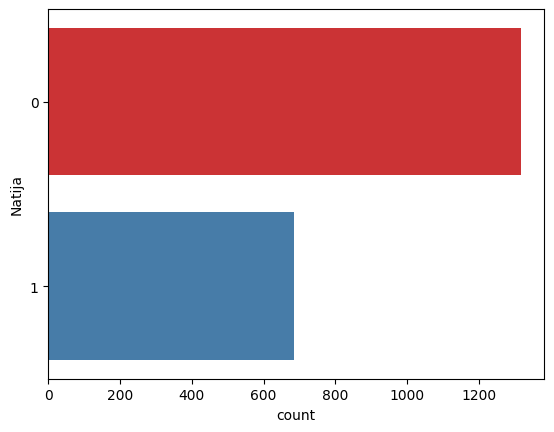

In [11]:
sns.countplot(y=df['Natija'],palette='Set1')

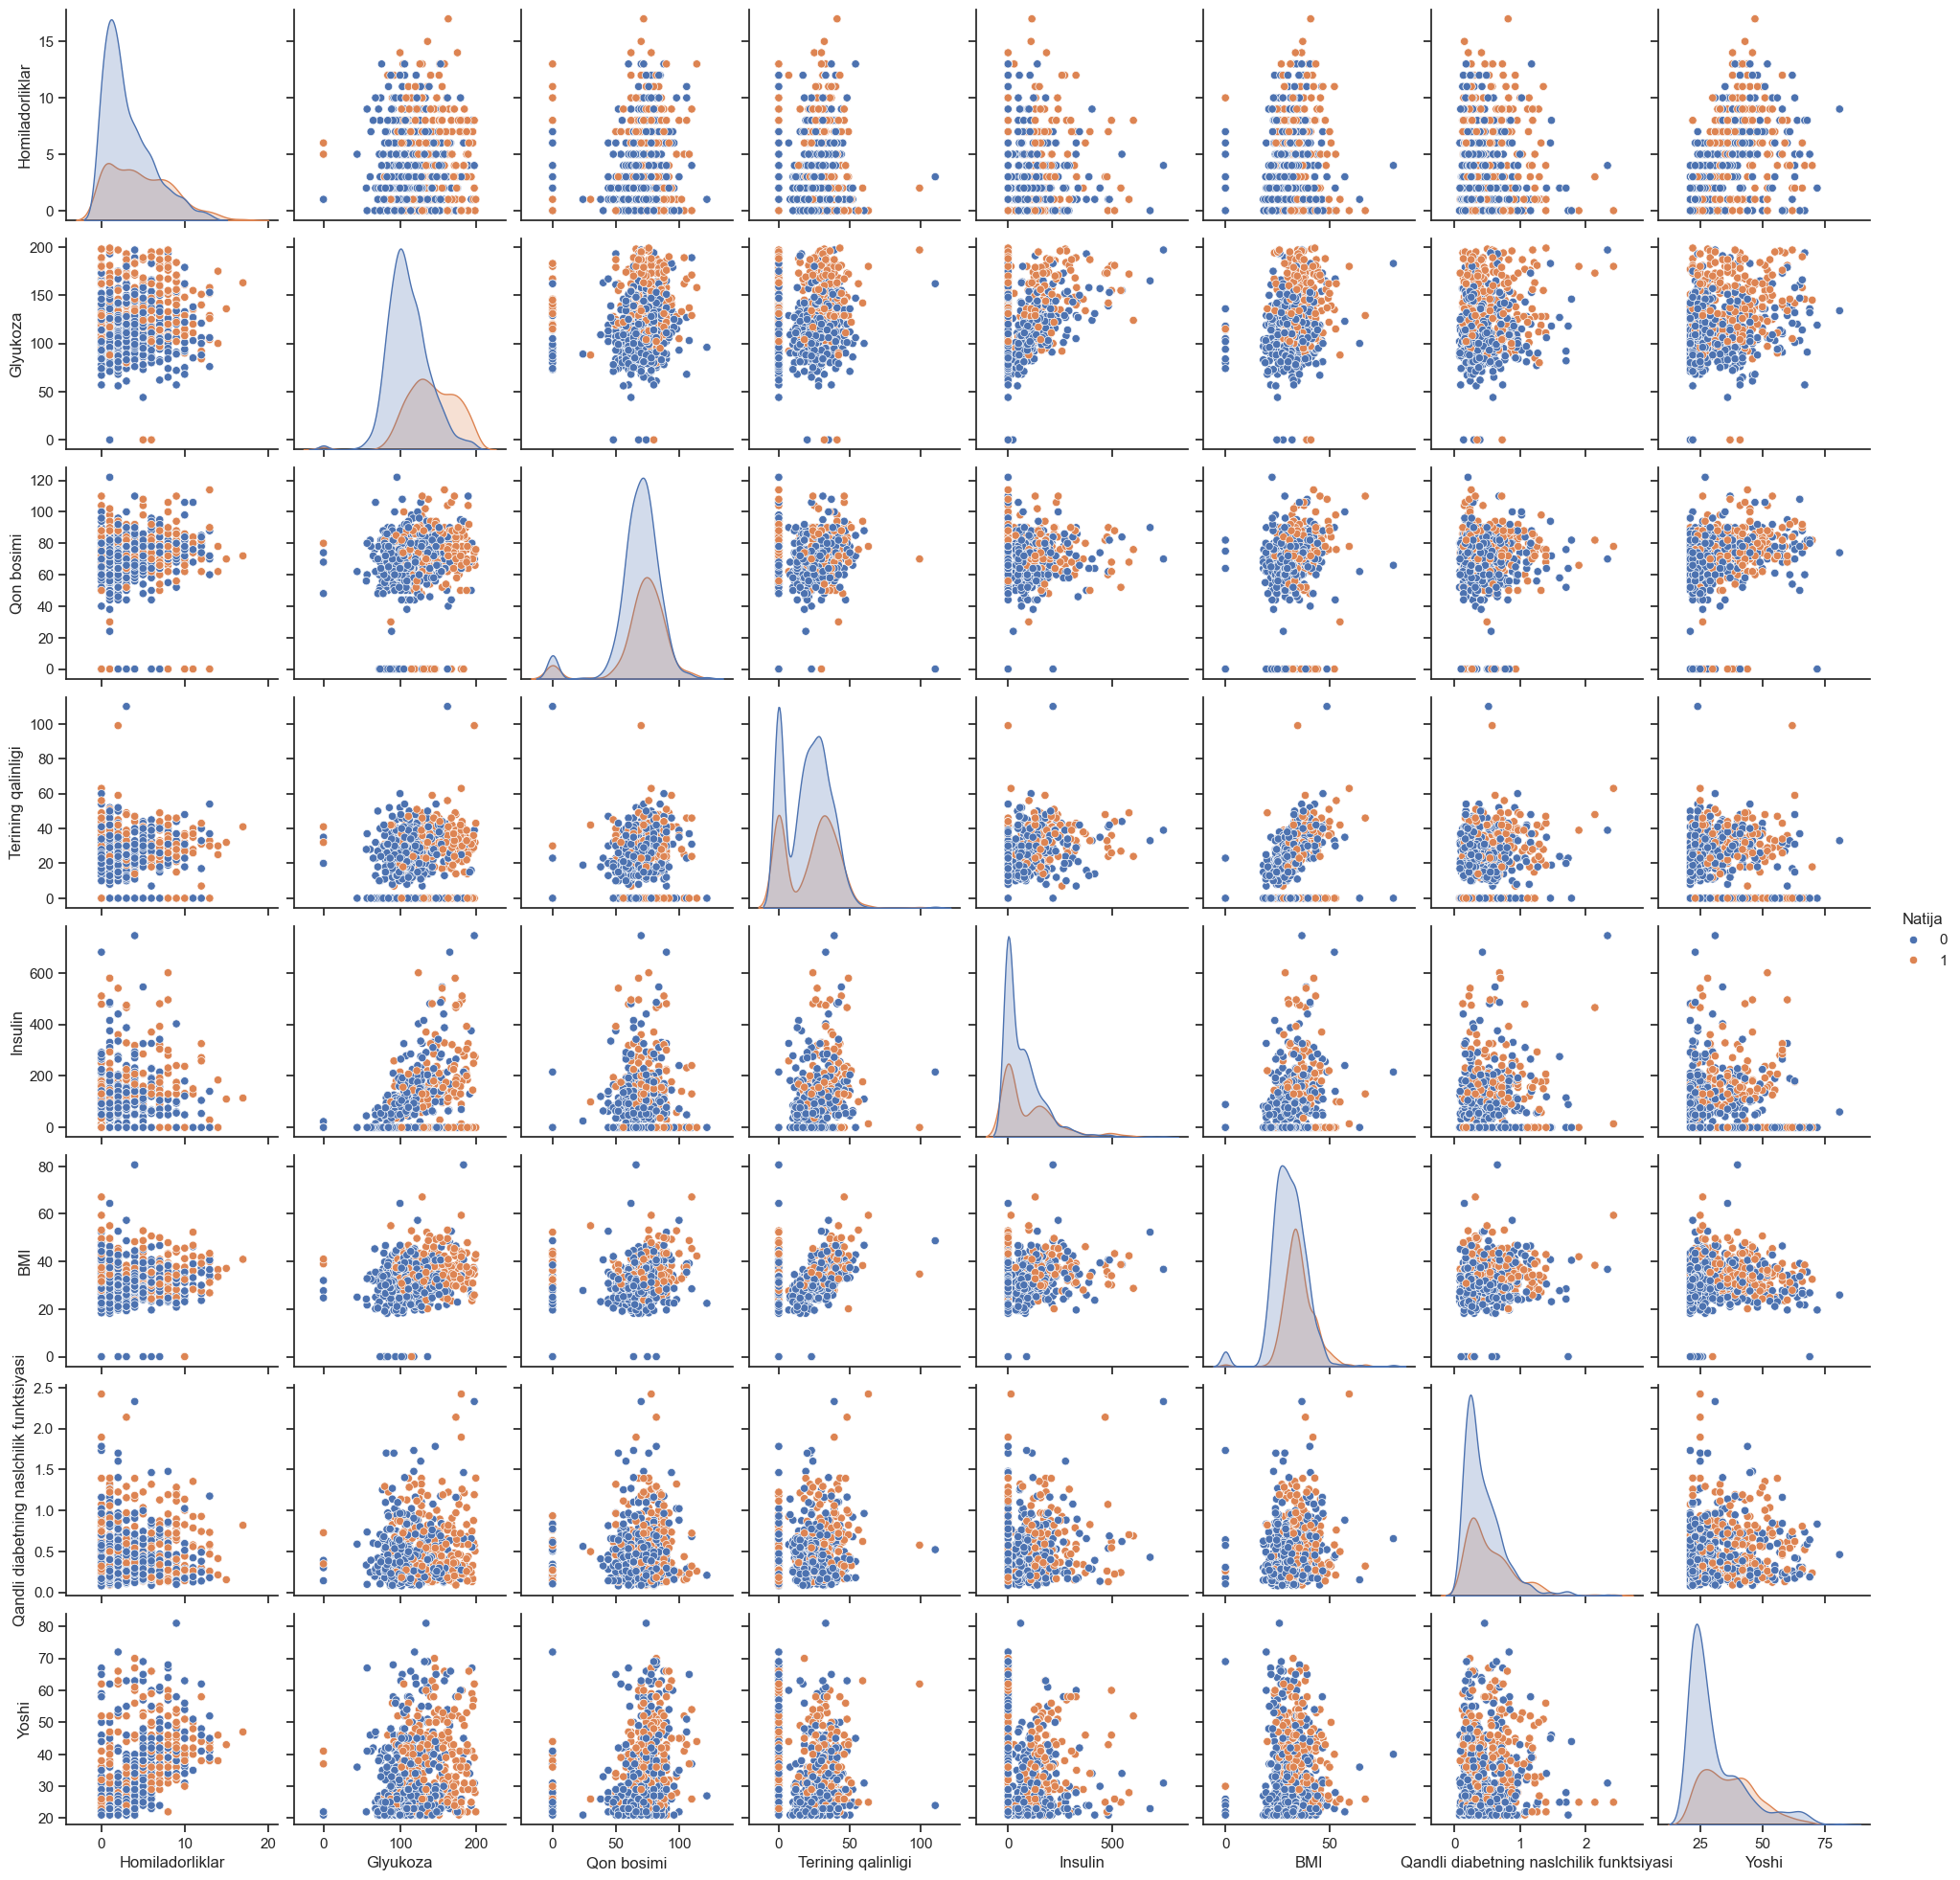

In [13]:
sns.set(style="ticks")
sns.pairplot(df, hue="Natija")

<Axes: >

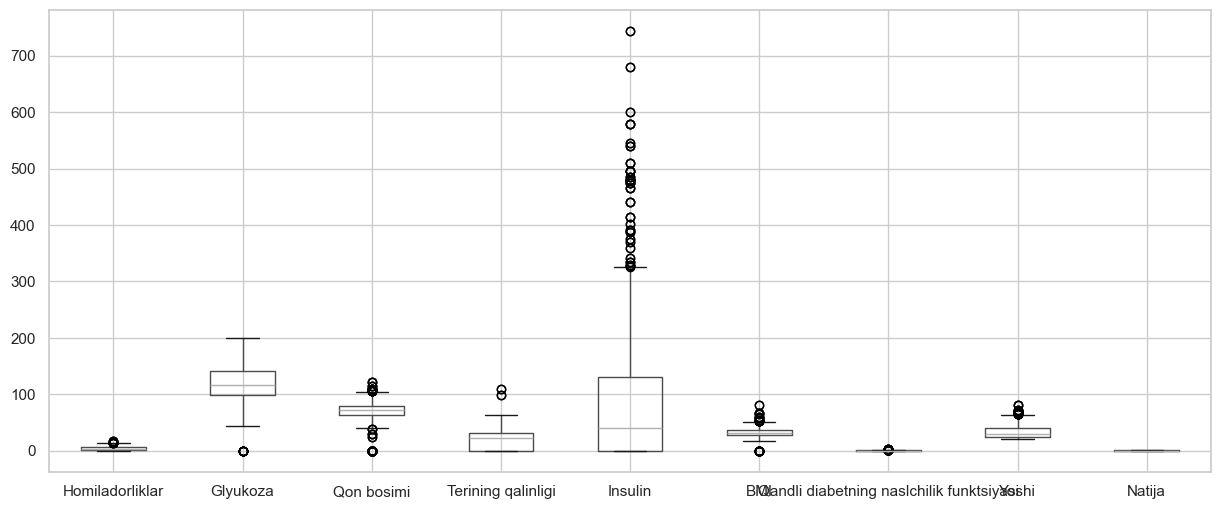

In [14]:
sns.set(style="whitegrid")
df.boxplot(figsize=(15,6))

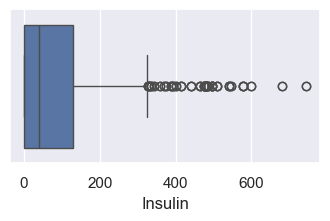

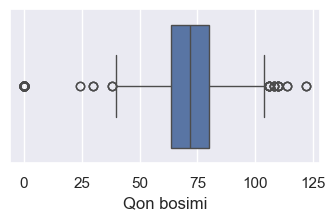

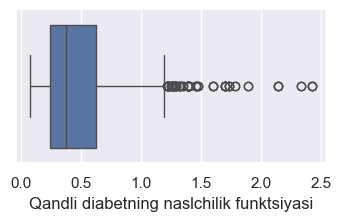

In [16]:
sns.set(style="whitegrid")

sns.set(rc={'figure.figsize':(4,2)})
sns.boxplot(x=df['Insulin'])
plt.show()
sns.boxplot(x=df['Qon bosimi'])
plt.show()
sns.boxplot(x=df['Qandli diabetning naslchilik funktsiyasi'])
plt.show()

In [17]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

print("---Q1--- \n",Q1)
print("\n---Q3--- \n",Q3)
print("\n---IQR---\n",IQR)

#print((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR)))

---Q1--- 
 Homiladorliklar                              1.000
Glyukoza                                    99.000
Qon bosimi                                  63.500
Terining qalinligi                           0.000
Insulin                                      0.000
BMI                                         27.375
Qandli diabetning naslchilik funktsiyasi     0.244
Yoshi                                       24.000
Natija                                       0.000
Name: 0.25, dtype: float64

---Q3--- 
 Homiladorliklar                               6.000
Glyukoza                                    141.000
Qon bosimi                                   80.000
Terining qalinligi                           32.000
Insulin                                     130.000
BMI                                          36.800
Qandli diabetning naslchilik funktsiyasi      0.624
Yoshi                                        40.000
Natija                                        1.000
Name: 0.75, dtype: floa

In [18]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape,df_out.shape

((2000, 9), (1652, 9))

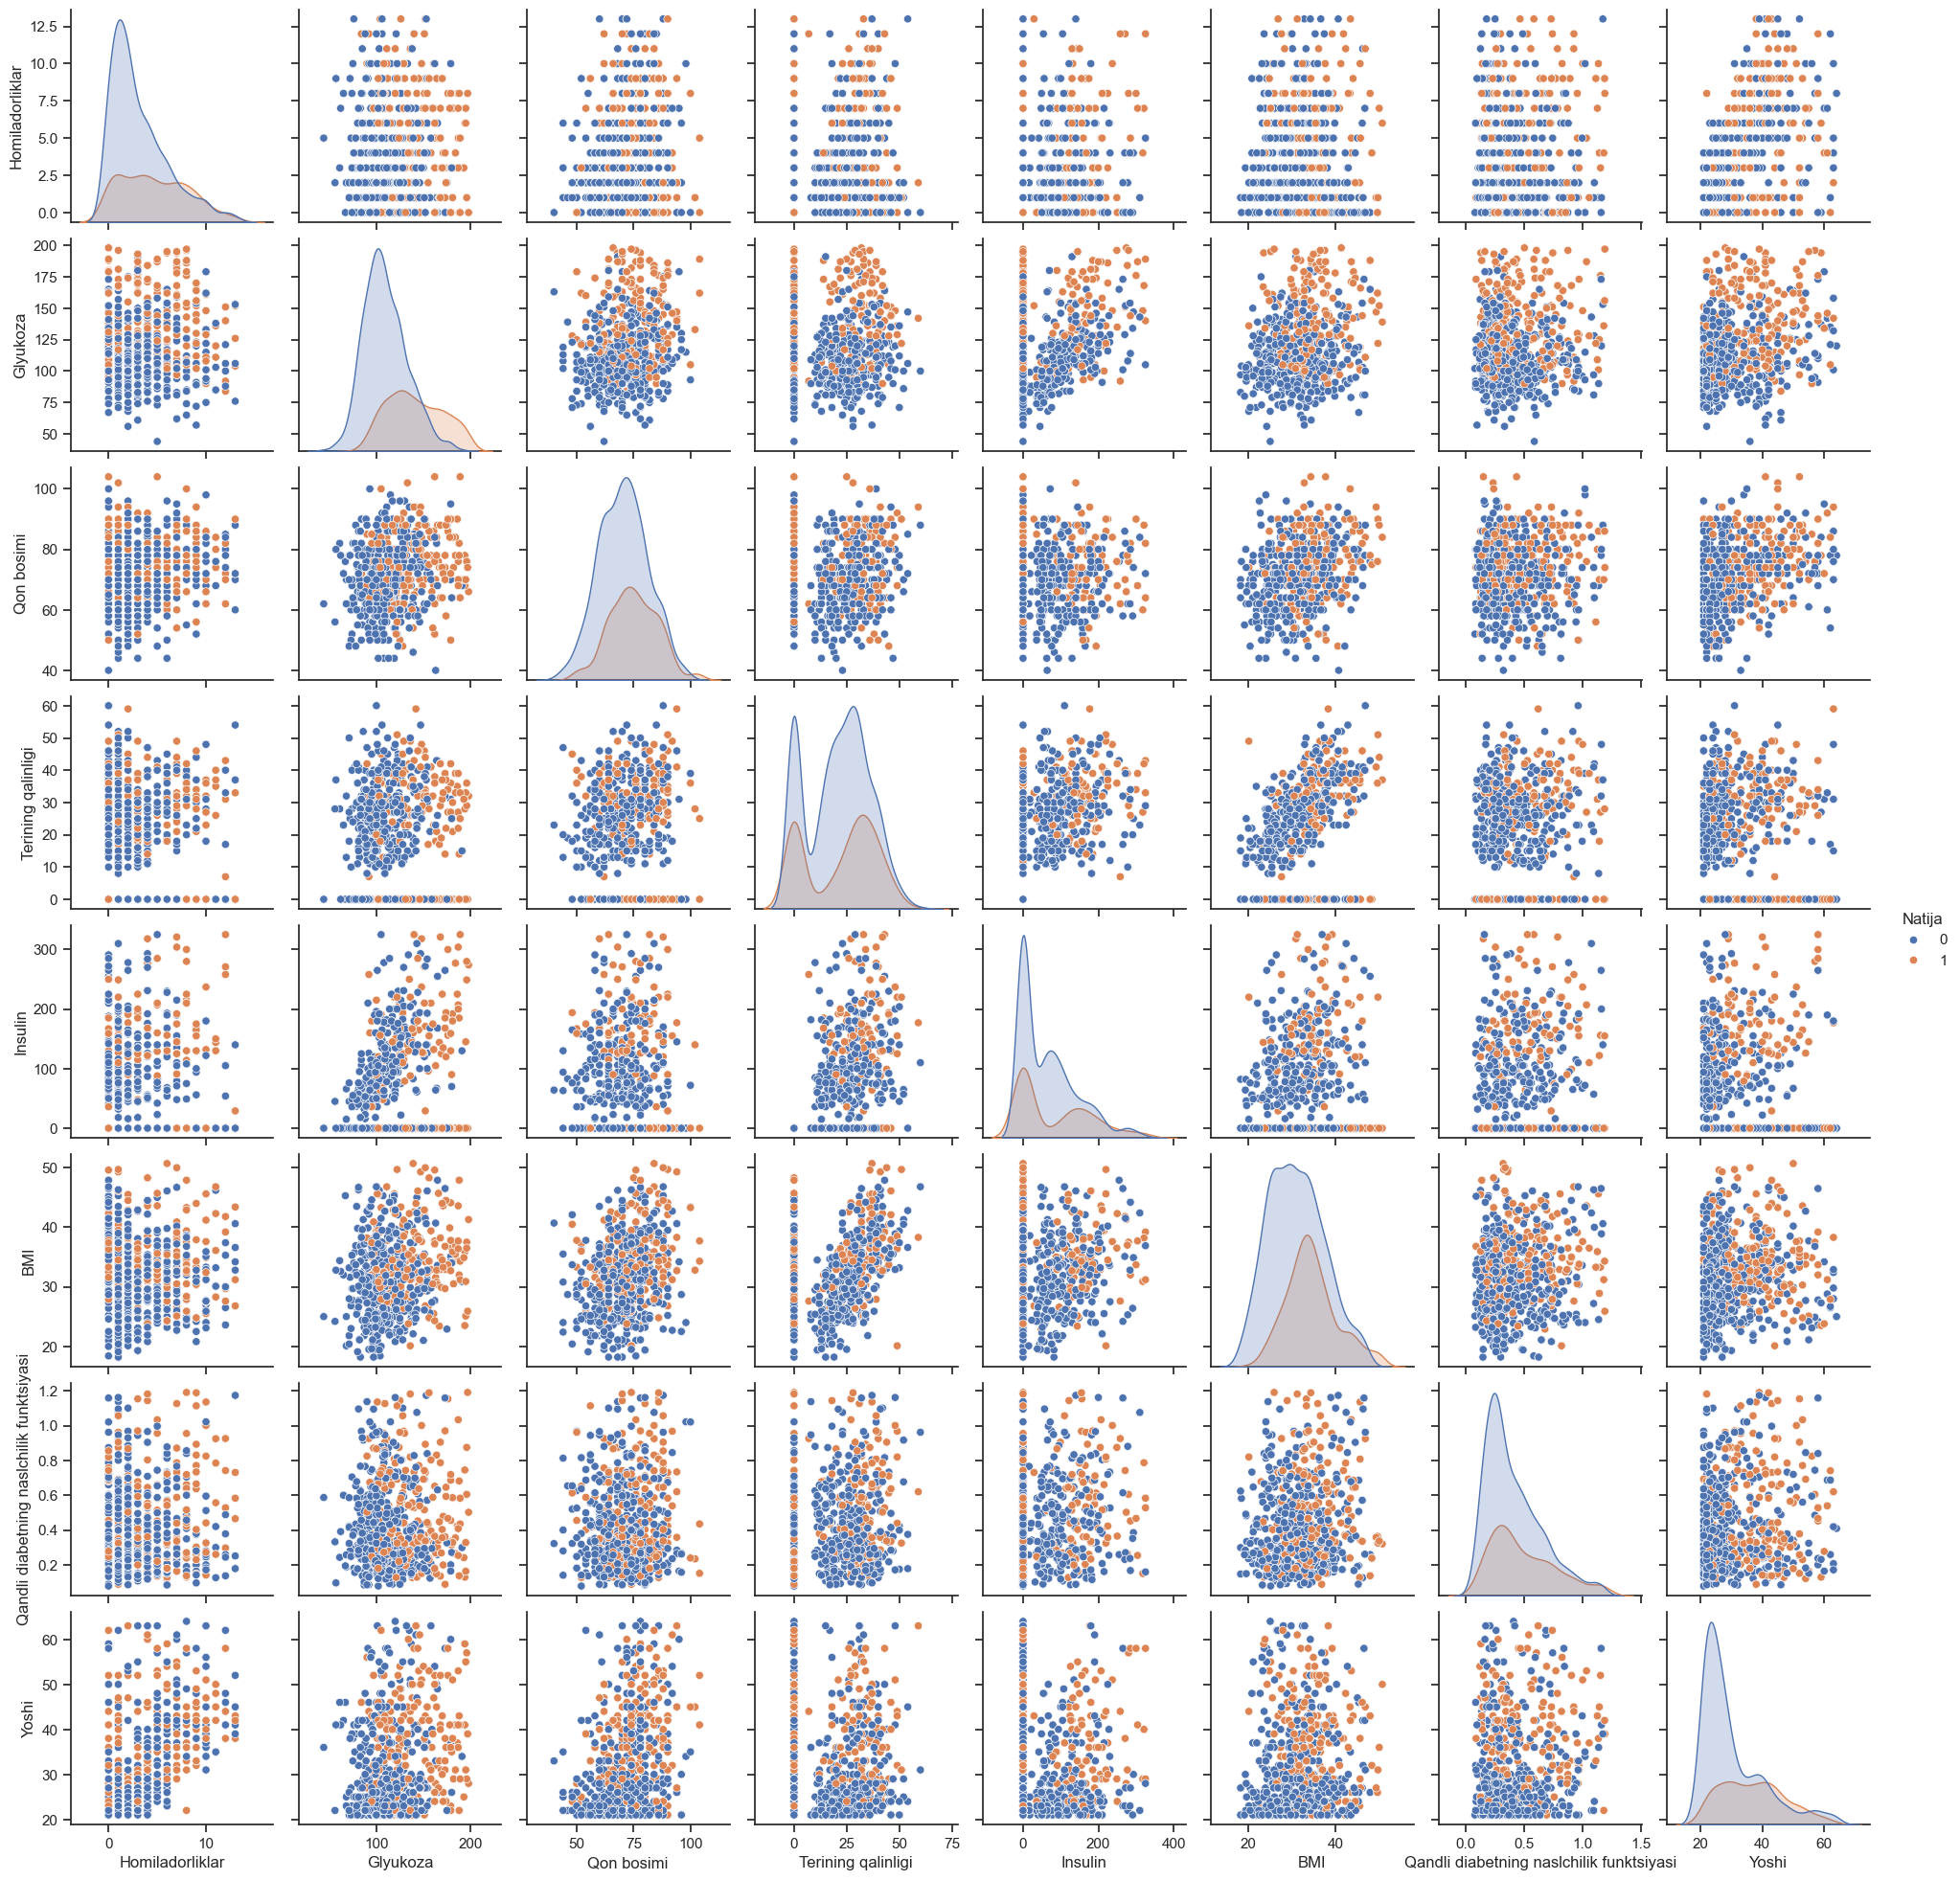

In [21]:
sns.set(style="ticks")
sns.pairplot(df_out, hue="Natija")
plt.show()

In [24]:
X=df_out.drop(columns=['Natija'])
y=df_out['Natija']

In [1]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

ModuleNotFoundError: No module named 'sklearn'